# Проверка ЦПТ для распределения Парето

Сгенерируйте выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

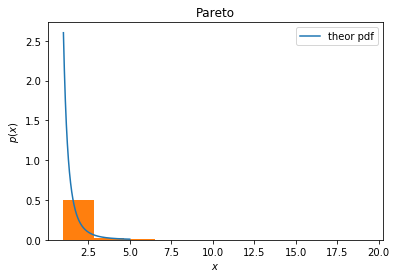

(array(1.625), array(1.69270833))

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

#https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pareto.html
b = 2.6  #базовый параметр
n = 1000 # объем выборки
r = sts.pareto (b, loc=0, scale=1)

m, v = r.stats(moments='mv') # оценки распределения Парето: среднее, дисперсия

rv = r.rvs(size=n) #генерируем 1000

x = np.linspace(1,5,n)
pdf = r.pdf(x) #плотность распределения

plt.plot(x, pdf, label='theor pdf') #и её график

plt.hist(rv, density=True) #гистограмма

plt.title("Pareto")
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()
m,v # оценки распределения Парето

In [2]:
m = b/(b-1) #среднее
v = ((1/(b-1)) ** 2)*(b/(b-2)) # дисперсия
s = math.sqrt(n*v/(n-1)) # стандартное отклонение
m,v,s # теоретические оценки распределения Парето по формулам Википедии

(1.625, 1.6927083333333333, 1.3016922585885662)

In [3]:
def test(rvs,n):
    means = []
    for i in range(1000): #выборки, тыщи их :)
        sample = rvs[np.random.randint(0,len(rvs),n)] #набираем выборку объема n
        means.append(np.mean(sample)) #набираем выборку средних
        
    M = np.mean(means) # считаем оценку среднего
    S = np.std(means,ddof=1) # считаем ст.отклон
    
    norm_rv = sts.norm(M,S) # формируем по ним нормльное распределение
    print ('Теор.среднее / приближенное: {:.6f} / {:.6f}'.format(m,M))
        
    plt.hist(means,density=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='normal')
    plt.legend()
    plt.ylabel('$p(x)$')
    plt.xlabel('$x$')
    plt.show()
    print(n)

Теор.среднее / приближенное: 1.625000 / 1.709811


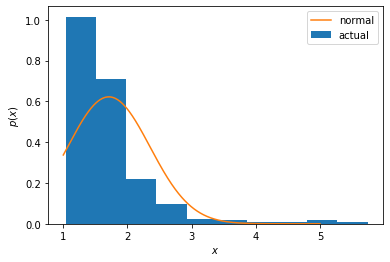

5


In [4]:
test(rv, 5)

Теор.среднее / приближенное: 1.625000 / 1.735239


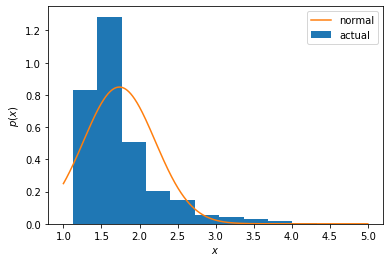

10


In [5]:
test(rv, 10)

Теор.среднее / приближенное: 1.625000 / 1.705559


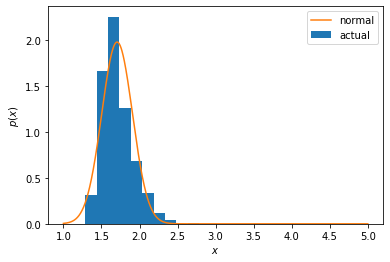

50


In [6]:
test(rv, 50)

# Действительно, в соответствии с ЦПТ, распределение выборочного среднего из распределения Парето хорошо апроксимируется распределением Гаусса и тем лучше, чем больше объем выборки